In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce


#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
import catboost as cb

#Metrics
from sklearn.metrics import r2_score 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import statsmodels.regression.linear_model as sm
from statsmodels.api import add_constant
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

df = pd.read_csv('./Files/train (1).csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.iloc[:, :40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Street        1460 non-null   object 
 6   Alley         91 non-null     object 
 7   LotShape      1460 non-null   object 
 8   LandContour   1460 non-null   object 
 9   Utilities     1460 non-null   object 
 10  LotConfig     1460 non-null   object 
 11  LandSlope     1460 non-null   object 
 12  Neighborhood  1460 non-null   object 
 13  Condition1    1460 non-null   object 
 14  Condition2    1460 non-null   object 
 15  BldgType      1460 non-null   object 
 16  HouseStyle    1460 non-null   object 
 17  OverallQual   1460 non-null   int64  
 18  OverallCond   1460 non-null 

In [5]:
df.iloc[:, 40:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HeatingQC      1460 non-null   object 
 1   CentralAir     1460 non-null   object 
 2   Electrical     1459 non-null   object 
 3   1stFlrSF       1460 non-null   int64  
 4   2ndFlrSF       1460 non-null   int64  
 5   LowQualFinSF   1460 non-null   int64  
 6   GrLivArea      1460 non-null   int64  
 7   BsmtFullBath   1460 non-null   int64  
 8   BsmtHalfBath   1460 non-null   int64  
 9   FullBath       1460 non-null   int64  
 10  HalfBath       1460 non-null   int64  
 11  BedroomAbvGr   1460 non-null   int64  
 12  KitchenAbvGr   1460 non-null   int64  
 13  KitchenQual    1460 non-null   object 
 14  TotRmsAbvGrd   1460 non-null   int64  
 15  Functional     1460 non-null   object 
 16  Fireplaces     1460 non-null   int64  
 17  FireplaceQu    770 non-null    object 
 18  GarageTy

In [6]:
df = df.fillna(df.select_dtypes(include=['float64']).mean()) #Fill null values with the mean

In [7]:
df.iloc[:, :40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1460 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Street        1460 non-null   object 
 6   Alley         91 non-null     object 
 7   LotShape      1460 non-null   object 
 8   LandContour   1460 non-null   object 
 9   Utilities     1460 non-null   object 
 10  LotConfig     1460 non-null   object 
 11  LandSlope     1460 non-null   object 
 12  Neighborhood  1460 non-null   object 
 13  Condition1    1460 non-null   object 
 14  Condition2    1460 non-null   object 
 15  BldgType      1460 non-null   object 
 16  HouseStyle    1460 non-null   object 
 17  OverallQual   1460 non-null   int64  
 18  OverallCond   1460 non-null 

In [8]:
df.BsmtQual = df.BsmtQual.fillna('None') #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
encoder = ce.OrdinalEncoder(cols=['BsmtQual'],return_df=True,
                           mapping=[{'col':'BsmtQual',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df['BsmtQual'] = encoder.fit_transform(df['BsmtQual'])

In [9]:
df.Alley = df.Alley.fillna('NoAll') #N/A mean No Alley, so let's replace with NoAll = No Alley

In [10]:
df.Electrical = df.Electrical.fillna('SBrkr') #Fill with the most common electrical system

In [11]:
df.BFireplaceQu = df.FireplaceQu.fillna('None') #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
encoder = ce.OrdinalEncoder(cols=['FireplaceQu'],return_df=True,
                           mapping=[{'col':'FireplaceQu',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df['FireplaceQu'] = encoder.fit_transform(df['FireplaceQu'])

In [12]:
df.GarageType = df.GarageType.fillna('NG') #N/A mean No garage, so let's replace with NG = No Garage

In [13]:
df.GarageFinish = df.GarageFinish.fillna('NG') #NaN mean No garage, so let's replace with NG = No Garage

In [14]:
df.PoolQC = df.PoolQC.fillna('None') #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
encoder = ce.OrdinalEncoder(cols=['PoolQC'],return_df=True,
                           mapping=[{'col':'PoolQC',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df['PoolQC'] = encoder.fit_transform(df['PoolQC'])

In [15]:
df.ExterQual = df.ExterQual.fillna('None') #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
encoder = ce.OrdinalEncoder(cols=['ExterQual'],return_df=True,
                           mapping=[{'col':'ExterQual',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df['ExterQual'] = encoder.fit_transform(df['ExterQual'])

In [16]:
df.HeatingQC = df.HeatingQC.fillna('None') #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
encoder = ce.OrdinalEncoder(cols=['HeatingQC'],return_df=True,
                           mapping=[{'col':'HeatingQC',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df['HeatingQC'] = encoder.fit_transform(df['HeatingQC'])

In [17]:
df.KitchenQual = df.KitchenQual.fillna('None') #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
encoder = ce.OrdinalEncoder(cols=['KitchenQual'],return_df=True,
                           mapping=[{'col':'KitchenQual',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df['KitchenQual'] = encoder.fit_transform(df['KitchenQual'])

In [18]:
encoder = ce.OrdinalEncoder(cols=['CentralAir'],return_df=True, #Encoding the feature to bi-number code
                           mapping=[{'col':'CentralAir',
'mapping':{'N':0, 'Y':1}}])
df['CentralAir'] = encoder.fit_transform(df['CentralAir'])

In [19]:
df.Fence = df.Fence.fillna('NoF') #Data points 'N/A', means doesn't have the attribute,so we replace with 'NoF', means a string indicating that doesn't have it.
df.MiscFeature = df.MiscFeature.fillna('None') #Data points 'N/A', means doesn't have the attribute,so we replace with 'None', means a string indicating that doesn't have it.
df.MasVnrType = df.MasVnrType.fillna('None') 

In [20]:
df['TotalBath'] = df[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].sum(axis=1) #Merge all columns related to baths
df = df.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'GarageQual', 'GarageCond', 'MoSold']) #Dropping those columns that with other can be explained

In [21]:
df.shape #Shape of our modified dataset

(1460, 63)

## Explotaroy Data Analysis

In [22]:
df_obj = df.select_dtypes('object') #Select only those columns with categorial values
colum_header = list(df_obj.columns.values) #List of categorical variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


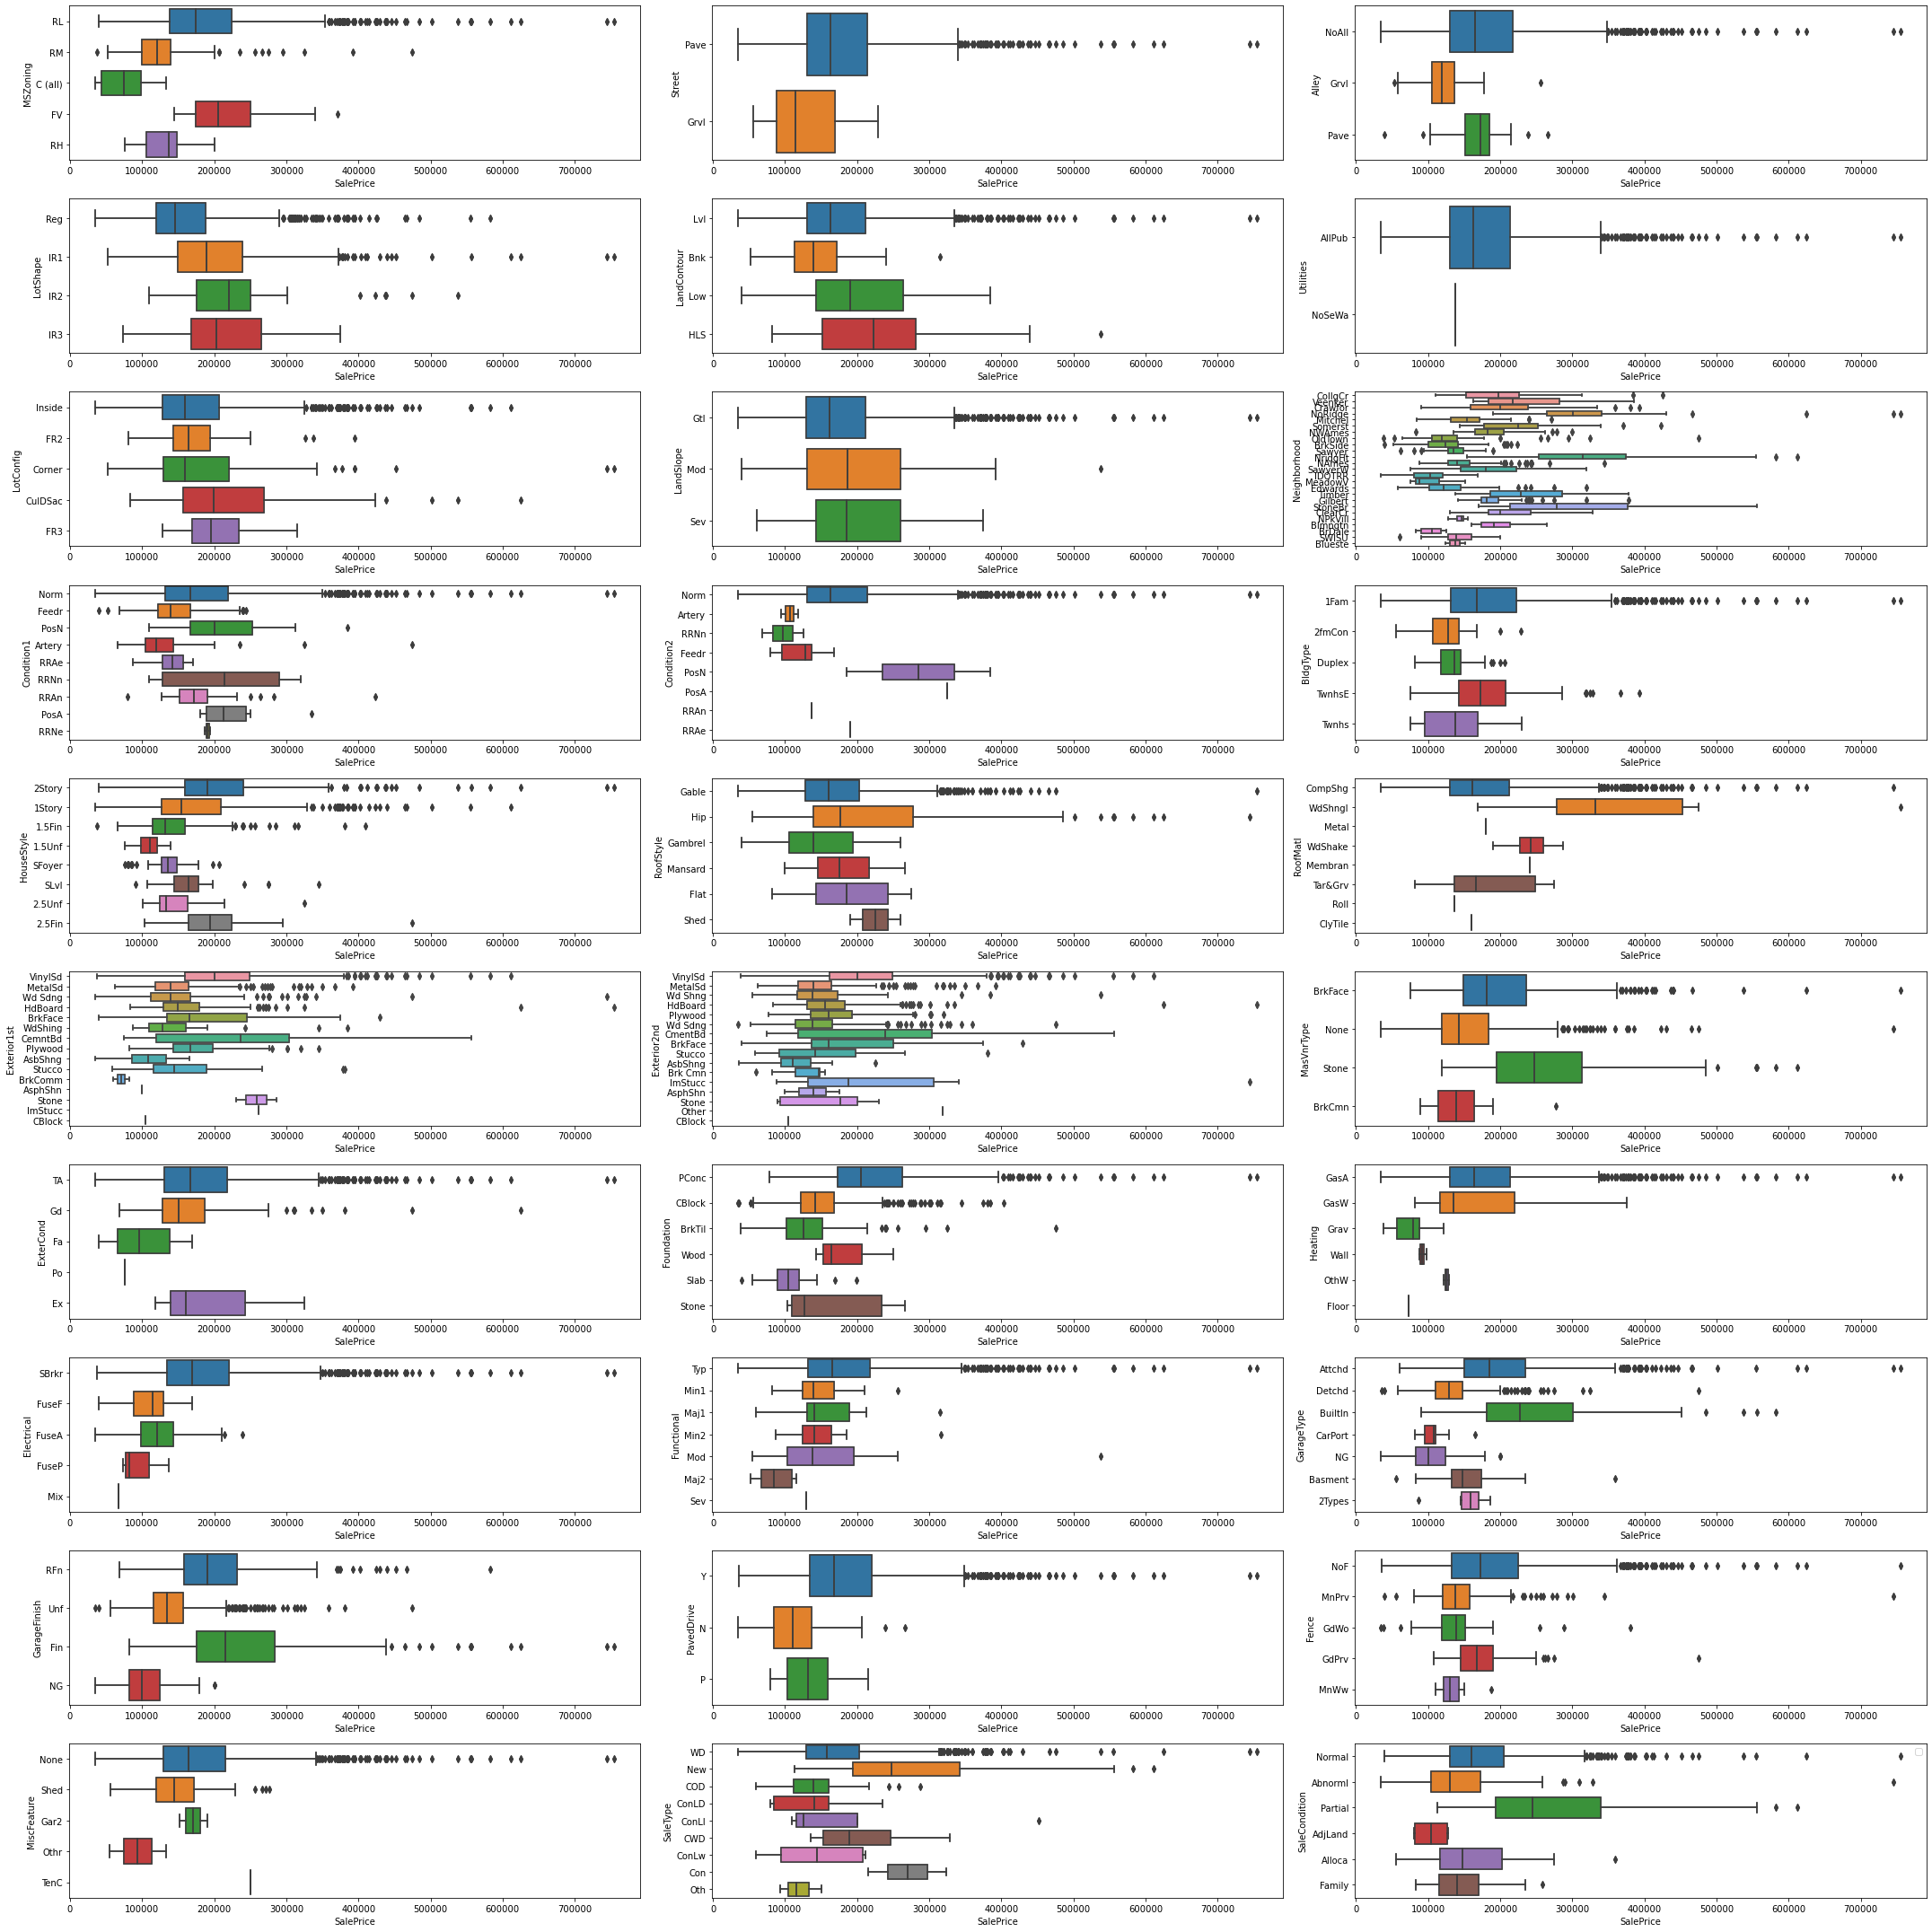

In [23]:
columns = 3

fig, axes = plt.subplots(len(colum_header) //columns, columns, figsize=(30,30))

for current_idx, variable in enumerate(colum_header):
   
    i = current_idx // columns # Rows
    j = current_idx % columns  # Columns

    sns.boxplot(x=df['SalePrice'], y=df_obj[variable], ax=axes[i][j])
    sns.boxplot(x=df['SalePrice'], y=df_obj[variable], ax=axes[i][j])

plt.tight_layout()
plt.legend()
plt.show()

Let's evaluate correlation between our numerical values

In [24]:
df_obj = df.select_dtypes(['int', 'float']) #Selecting numerical values
colum_header = list(df_obj.columns.values) #List of numerical variables

IndexError: index 8 is out of bounds for axis 0 with size 8

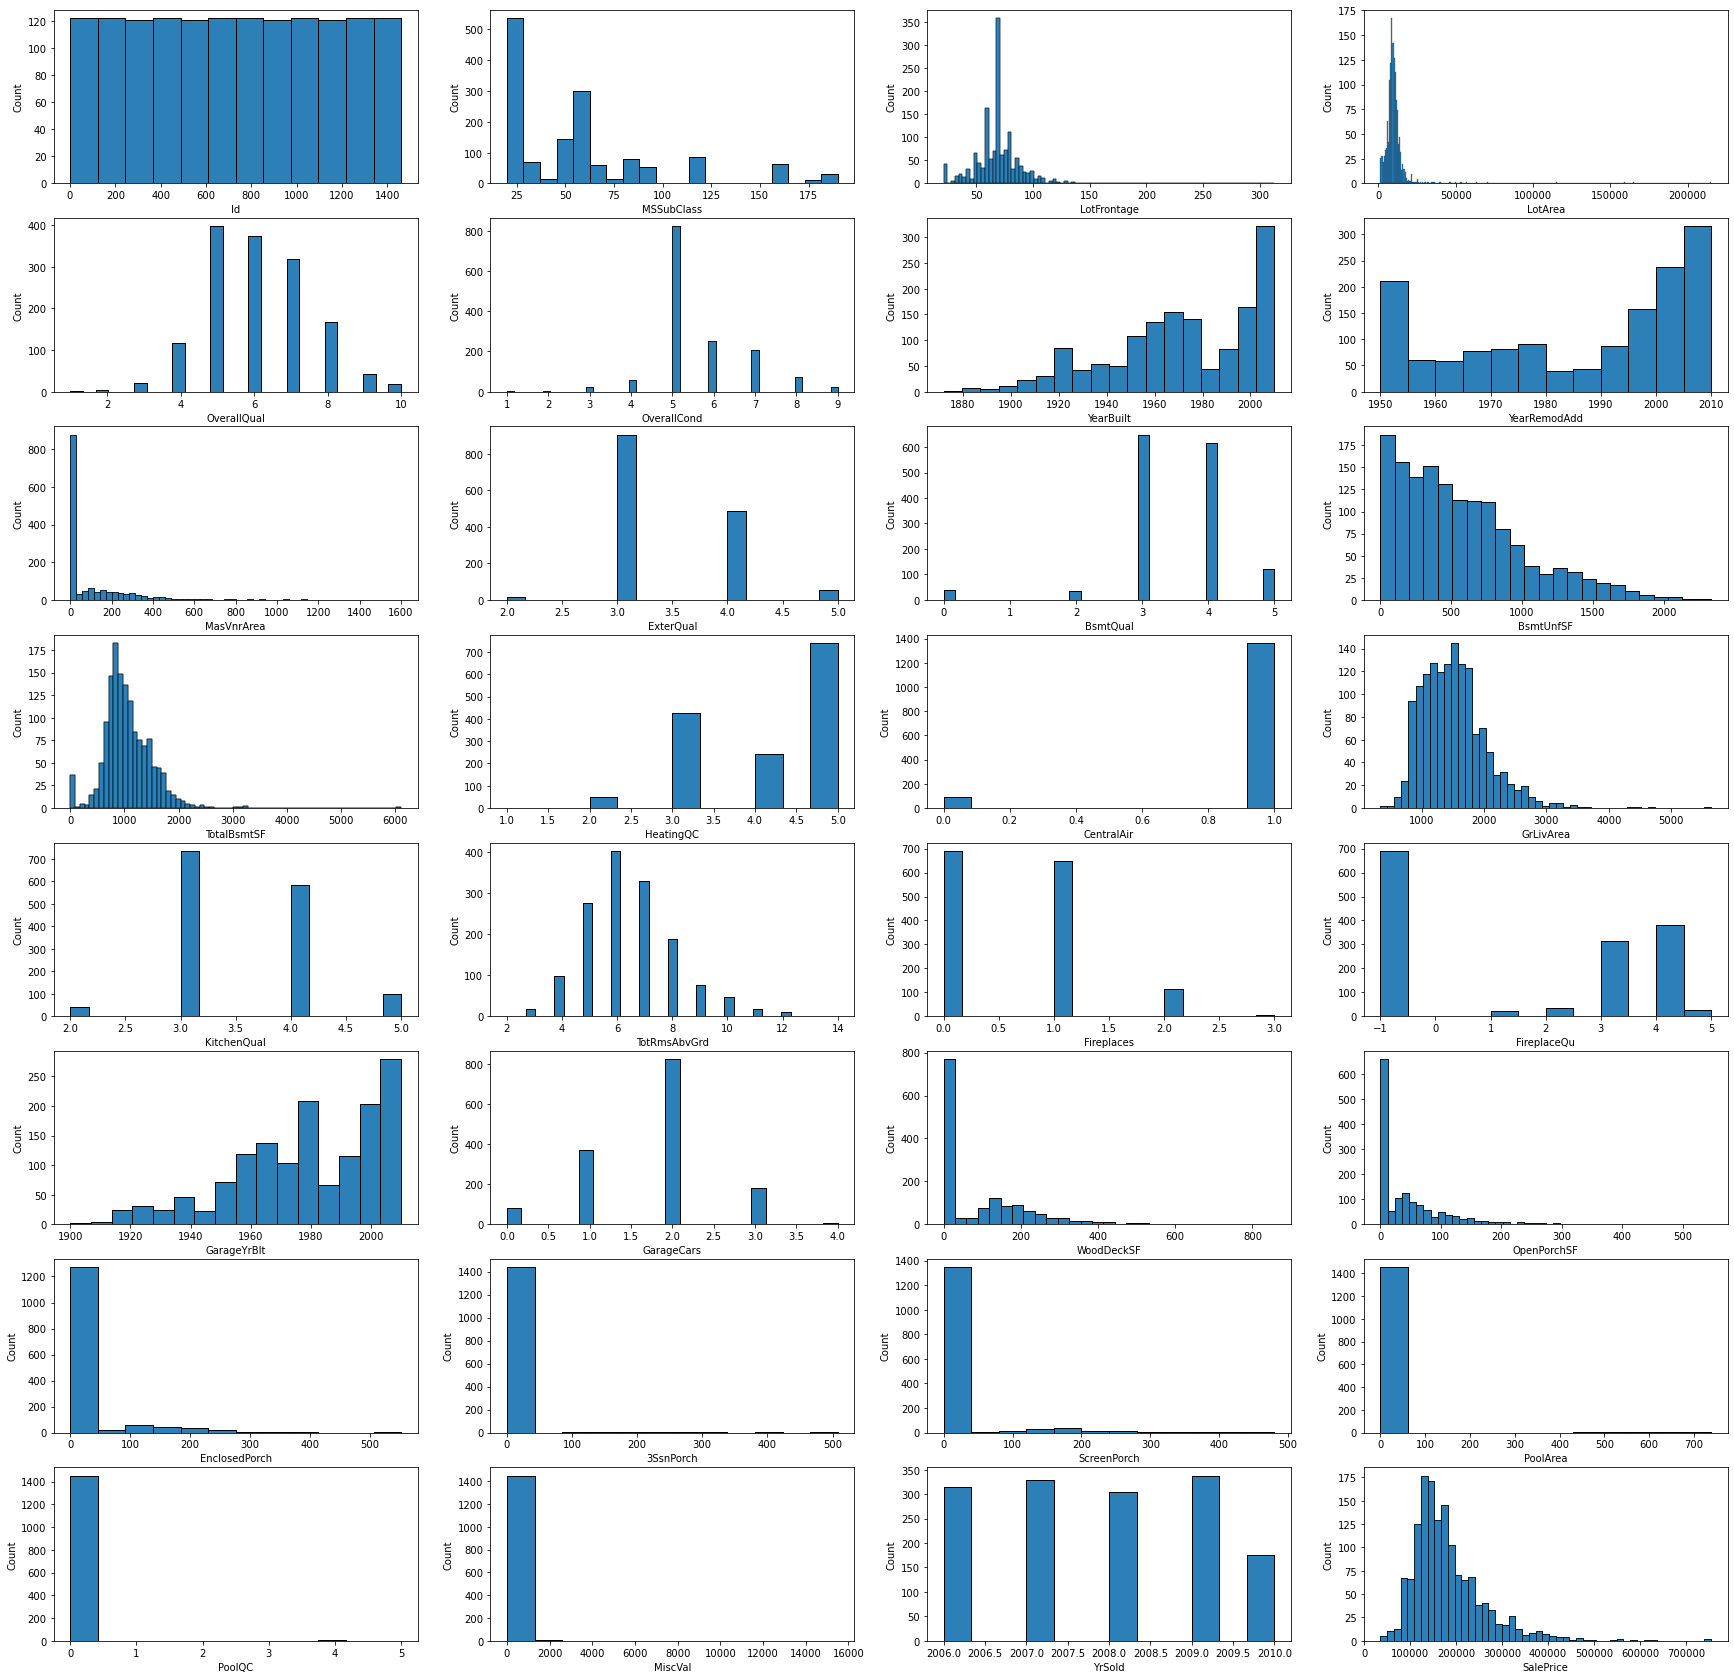

In [25]:
columns = 4
fig, axes = plt.subplots(len(colum_header) //columns, columns, figsize=(30,30))

for current_idx, variable in enumerate(colum_header):
   
    i = current_idx // columns #Rows
    j = current_idx % columns  #Columns

    sns.histplot(df[variable], ax=axes[i][j])
    sns.histplot(df[variable], ax=axes[i][j])

plt.tight_layout()
plt.legend()
plt.show()

In [26]:
corr_matrix = df.corr() #Correlation between numerical values
corr_matrix["SalePrice"].sort_values(ascending=False) #Let's sort them from higher to lower

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
TotalBsmtSF      0.613581
TotalBath        0.613005
BsmtQual         0.585207
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.513923
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
HeatingQC        0.427649
LotFrontage      0.334901
WoodDeckSF       0.324413
OpenPorchSF      0.315856
LotArea          0.263843
CentralAir       0.251328
BsmtUnfSF        0.214479
PoolQC           0.111696
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
MiscVal         -0.021190
Id              -0.021917
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

#### Prepare data for modeling

In [27]:
X = df.drop(columns='SalePrice') #Dropping dependent variable
y = df.iloc[:, -2] #Left alone just the dependent variable that is the house's prices

In [28]:
A = X.select_dtypes(['int', 'float']) #Numerical variables
B = pd.get_dummies(X.select_dtypes('object')) #Encoding the categorical variables
X_new = pd.concat([A,B],axis=1) #Merge two data set (Numerical and Categorical)
X_new

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,3,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,3,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,5,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,3,...,0,0,0,1,0,0,0,0,1,0


#### Split the dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42) #Split of dataset trein and test

### Random Forest Regression

In [31]:
model = RandomForestRegressor() #Create model
scores = cross_val_score(model, X_new, y, cv=7, verbose=1,scoring='r2') #Use cross_val to evaluate 7 times our model and see score of r2
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.3s finished


array([0.87537418, 0.90567627, 0.80981853, 0.8581902 , 0.8934127 ,
       0.81884869, 0.75019765])

In [32]:
print("%0.2f mean r2, and standard deviation %0.2f" % (scores.mean(), scores.std()))

0.84 mean r2, and standard deviation 0.05


In [37]:
random_forest_nuevo = RandomForestRegressor(max_depth=9, max_features= 18, n_estimators=900) #Instanciamos el modelo with news parameters

In [38]:
scores = cross_val_score(random_forest_nuevo, X_new, y, cv=7, verbose=1,scoring='r2') #Run again cross_vale with new parameters
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.6s finished


array([0.88077781, 0.88576235, 0.80805864, 0.82653307, 0.88213215,
       0.7820371 , 0.80634626])

In [39]:
print("%0.2f mean r2, and standard deviation %0.2f" % (scores.mean(), scores.std()))

0.84 mean r2, and standard deviation 0.04


In [40]:
random_forest_nuevo.fit(X_train,y_train) #Fit data

RandomForestRegressor(max_depth=9, max_features=18, n_estimators=900)

In [41]:
pred = random_forest_nuevo.predict(X_test) #Make predictions

In [42]:
rmserf = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2: ',r2_score(y_true= y_test, y_pred= pred))

RMSE: 35127.67466571283
R2:  0.8391263299513985


### Gradient Boosting

In [43]:
gbr = GradientBoostingRegressor() #Built model

In [44]:
scores = cross_val_score(gbr, X_new, y, cv=10, verbose=1,scoring='r2') #Use cross_val to evaluate 7 times our model and see score of r2
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.9s finished


array([0.90141393, 0.92757174, 0.93672587, 0.80547397, 0.8649527 ,
       0.91202243, 0.89460745, 0.91353278, 0.84636224, 0.87523438])

#### Let's use GridSearchCV

In [45]:
param_grid = {'max_depth' : [3, 7, 9],
              'n_estimators' : [500, 700, 900],
              'learning_rate' : [0.01, 0.1, 1.0],
              'subsample' : [0.5, 0.7, 1]}

grid_gb = GridSearchCV(estimator = gbr,
                                  param_grid = param_grid,
                                  cv = 7, 
                                  n_jobs = -1)              

In [46]:
grid_gb.fit(X_train, y_train) #fit our gridseach model

GridSearchCV(cv=7, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 7, 9],
                         'n_estimators': [500, 700, 900],
                         'subsample': [0.5, 0.7, 1]})

In [47]:
grid_gb.best_params_ #Find best parameters

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900, 'subsample': 0.7}

In [48]:
gbr_new = GradientBoostingRegressor(n_estimators=900, #Tunning hyperparameters
    learning_rate=0.01,
    max_depth= 3, 
    subsample=0.7,
    min_samples_leaf=2)

In [49]:
scores = cross_val_score(gbr_new, X_new, y, cv=10, verbose=1,scoring='r2') #Run again cross_vale with new model
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   32.9s finished


array([0.91547674, 0.92273336, 0.93867378, 0.77091036, 0.89429176,
       0.91504997, 0.9086405 , 0.91444831, 0.81895512, 0.88518162])

In [50]:
gbr_new.fit(X_train,y_train) #Fit our model

GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=2,
                          n_estimators=900, subsample=0.7)

In [51]:
ypredi = gbr_new.predict(X_test) #Make predictions

In [52]:
rmsegb = np.sqrt(mean_squared_error(y_test, ypredi))
print('RMSE: ', rmsegb)
print('R2: ',r2_score(y_true= y_test, y_pred= ypredi))

RMSE:  26408.84686348779
R2:  0.9090746372682745


### XGBOOST

In [53]:
xgb = XGBRegressor(n_estimators = 10000, max_depth = 2, eta = 0.01, min_child_weight = 0, subsample = 1, colsample_bytree=1, seed=5)

In [54]:
scores = cross_val_score(xgb, X_new, y, cv=7, verbose=1,scoring='r2') #Use cross_val to evaluate 7 times our model and see score of r2
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.6min finished


array([0.90111083, 0.9284278 , 0.77465988, 0.90205091, 0.91090822,
       0.88109322, 0.84630868])

In [55]:
print("%0.2f mean r2, and standard deviation %0.2f" % (scores.mean(), scores.std()))

0.88 mean r2, and standard deviation 0.05


In [56]:
xgb.fit(X_train, y_train) #Fit our data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.01,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [57]:
bpred = xgb.predict(X_test) #Make predictions

In [58]:
rmsexg = np.sqrt(mean_squared_error(y_test, bpred))
print('RMSE: ', rmsexg)
print('R2: ',r2_score(y_true= y_test, y_pred= bpred))

RMSE:  25071.295000246068
R2:  0.918051746951728


### CATBOOST

In [59]:
model = cb.CatBoostRegressor(loss_function='RMSE') #Built our model

In [112]:
grid = {'iterations': [300, 500, 700],
        'learning_rate': [0.03, 0.1, 0.01],
        'depth': [4, 6, 8],
        'l2_leaf_reg': [0.5, 1, 3],
       'min_child_samples': [1, 4, 8]}

model.grid_search(grid, X_train, y_train)

In [212]:
model_new = cb.CatBoostRegressor(iterations = 700,
        learning_rate = 0.03,
        depth = 8,
        l2_leaf_reg = 1,
        min_child_samples = 1) #Tunning model with best hyperparameters

In [213]:
model_new.fit(X_train, y_train) #Fit our model

0:	learn: 75612.8225423	total: 12.8ms	remaining: 8.96s
1:	learn: 74129.2409544	total: 17.2ms	remaining: 5.99s
2:	learn: 72554.8814160	total: 21.9ms	remaining: 5.08s
3:	learn: 71109.6454078	total: 26.6ms	remaining: 4.63s
4:	learn: 69803.6280787	total: 31.2ms	remaining: 4.34s
5:	learn: 68476.2975861	total: 38.4ms	remaining: 4.44s
6:	learn: 67192.3786750	total: 43.8ms	remaining: 4.34s
7:	learn: 65893.6576128	total: 48.4ms	remaining: 4.18s
8:	learn: 64682.2026843	total: 54ms	remaining: 4.14s
9:	learn: 63450.8206066	total: 58.3ms	remaining: 4.03s
10:	learn: 62199.8979050	total: 63.6ms	remaining: 3.98s
11:	learn: 61000.0719244	total: 69.2ms	remaining: 3.97s
12:	learn: 59839.4639789	total: 73ms	remaining: 3.86s
13:	learn: 58754.1752774	total: 77.7ms	remaining: 3.81s
14:	learn: 57718.5689571	total: 82.9ms	remaining: 3.79s
15:	learn: 56660.7027750	total: 87.1ms	remaining: 3.73s
16:	learn: 55677.0613966	total: 91ms	remaining: 3.66s
17:	learn: 54671.7552778	total: 95.3ms	remaining: 3.61s
18:	lear

In [214]:
predc = model_new.predict(X_test) #Make predictions
rmsecat = (np.sqrt(mean_squared_error(y_test, predc)))
r2 = r2_score(y_test, predc)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmsecat))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 28926.48
R2: 0.89


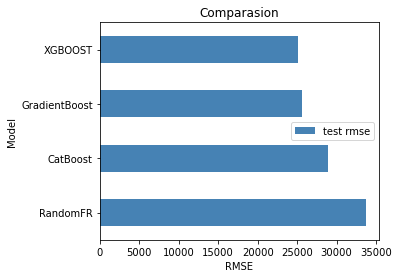

In [215]:
df_comparacion = pd.DataFrame({
                    'modelo': ['RandomFR', 'GradientBoost', 'XGBOOST', 'CatBoost'],
                    'test rmse': [rmserf, rmsegb, rmsexg, rmsecat]
                 }).sort_values(by='test rmse', ascending=False) #Create a DataFrame with our results

fig, ax = plt.subplots(figsize=(5, 4))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('RMSE')
ax.set_ylabel('Model')
ax.set_title('Comparasion'); #Create our visualization comparing all RMSE from the models

## Test Dataset

In [4]:
df_test = pd.read_csv('./Files/test.csv')
df_test.head() #Check features of test dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [229]:
df_test = df_test.fillna(df_test.select_dtypes(include=['float64']).mean()) #Fill N/A in numerical features with the mean
df_test.Alley = df_test.Alley.fillna('NoAll') #N/A mean No Alley, so let's replace with NoAll = No Alley
df_test.Electrical = df_test.Electrical.fillna('SBrkr') #Fill with the most common electrical system
df_test.BFireplaceQu = df_test.FireplaceQu.fillna('None') 
df_test.BsmtQual = df_test.BsmtQual.fillna('None') #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
encoder = ce.OrdinalEncoder(cols=['BsmtQual'],return_df=True,
                           mapping=[{'col':'BsmtQual',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df_test['BsmtQual'] = encoder.fit_transform(df_test['BsmtQual'])
encoder = ce.OrdinalEncoder(cols=['FireplaceQu'],return_df=True, #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
                           mapping=[{'col':'FireplaceQu',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df_test['FireplaceQu'] = encoder.fit_transform(df_test['FireplaceQu'])
df_test.GarageType = df_test.GarageType.fillna('NG') #NaN mean No garage, so let's replace with NG = No Garage
df_test.GarageFinish = df_test.GarageFinish.fillna('NG') #NaN mean No garage, so let's replace with NG = No Garage
df_test.PoolQC = df_test.PoolQC.fillna('None') #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
encoder = ce.OrdinalEncoder(cols=['PoolQC'],return_df=True,
                           mapping=[{'col':'PoolQC',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df_test['PoolQC'] = encoder.fit_transform(df_test['PoolQC']) 
df_test.ExterQual = df_test.ExterQual.fillna('None') #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
encoder = ce.OrdinalEncoder(cols=['ExterQual'],return_df=True,
                           mapping=[{'col':'ExterQual',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df_test['ExterQual'] = encoder.fit_transform(df_test['ExterQual']) 
df_test.HeatingQC = df_test.HeatingQC.fillna('None') #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
encoder = ce.OrdinalEncoder(cols=['HeatingQC'],return_df=True,
                           mapping=[{'col':'HeatingQC',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df_test['HeatingQC'] = encoder.fit_transform(df_test['HeatingQC'])
df_test.KitchenQual = df_test.KitchenQual.fillna('None') #Quality refers from doesn't have to excelent quality. So we change from 0 (doesn't have) to 5 (excelente).
encoder = ce.OrdinalEncoder(cols=['KitchenQual'],return_df=True,
                           mapping=[{'col':'KitchenQual',
'mapping':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}])
df_test['KitchenQual'] = encoder.fit_transform(df_test['KitchenQual'])
encoder = ce.OrdinalEncoder(cols=['CentralAir'],return_df=True, 
                           mapping=[{'col':'CentralAir',
'mapping':{'N':0, 'Y':1}}])
df_test['CentralAir'] = encoder.fit_transform(df_test['CentralAir']) #Encoding the feature to bi-number code
df_test.Fence = df_test.Fence.fillna('NoF') #Data points 'N/A', means doesn't have the attribute,so we replace with 'NoF', means a string indicating that doesn't have it.
df_test.MiscFeature = df_test.MiscFeature.fillna('None') #Data points 'N/A', means doesn't have the attribute,so we replace with 'None', means a string indicating that doesn't have it.
df_test.MasVnrType = df_test.MasVnrType.fillna('None')
df_test['TotalBath'] = df_test[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].sum(axis=1) #Merge all columns related to baths
df_test = df_test.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'GarageQual', 'GarageCond', 'MoSold']) #Dropping those columns that with other can be explained


In [230]:
df_test.Exterior1st = df_test.Exterior1st.fillna('VinylSd') #Fill with the most common electrical system
df_test.MSZoning = df_test.MSZoning.fillna('RL') #Fill with the most common electrical system
df_test.Exterior2nd = df_test.Exterior2nd.fillna('VinylSd') #Fill with the most common electrical system
df_test.Functional = df_test.Functional.fillna('Typ') #Fill with the most common electrical system
df_test.SaleType = df_test.SaleType.fillna('WD') #Fill with the most common electrical system

In [231]:
X = df_test

In [232]:
A = df_test.select_dtypes(['int', 'float']) #Numerical features
B = pd.get_dummies(df_test.select_dtypes('object')) #Encoding categorical values
X_new_test = pd.concat([A,B],axis=1) #Merge both tables
X_new_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,3,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,3,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,3,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,3,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,3,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,3,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,3,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,3,...,0,0,0,1,0,0,0,0,1,0


In [235]:
X_new_test[['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'MiscFeature_TenC', 'Utilities_NoSeWa', 'RoofMatl_ClyTile', 'RoofMatl_Membran']] = 0 #Adding columns that don't appear in test dataset

In [237]:
df_test['SalePrice'] = model_new.predict(X_new_test) #Adding columns in test dataset with predictos

In [238]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,TotalBath,SalePrice
0,1461,20,RH,80.0,11622,Pave,NoAll,Reg,Lvl,AllPub,...,0,0,MnPrv,None,0,2010,WD,Normal,1.0,121417.090341
1,1462,20,RL,81.0,14267,Pave,NoAll,IR1,Lvl,AllPub,...,0,0,NoF,Gar2,12500,2010,WD,Normal,2.0,165269.752291
2,1463,60,RL,74.0,13830,Pave,NoAll,IR1,Lvl,AllPub,...,0,0,MnPrv,None,0,2010,WD,Normal,3.0,184222.159205
3,1464,60,RL,78.0,9978,Pave,NoAll,IR1,Lvl,AllPub,...,0,0,NoF,None,0,2010,WD,Normal,3.0,192541.575848
4,1465,120,RL,43.0,5005,Pave,NoAll,IR1,HLS,AllPub,...,0,0,NoF,None,0,2010,WD,Normal,2.0,194737.287091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NoAll,Reg,Lvl,AllPub,...,0,0,NoF,None,0,2006,WD,Normal,2.0,86777.239221
1455,2916,160,RM,21.0,1894,Pave,NoAll,Reg,Lvl,AllPub,...,0,0,NoF,None,0,2006,WD,Abnorml,2.0,82700.682664
1456,2917,20,RL,160.0,20000,Pave,NoAll,Reg,Lvl,AllPub,...,0,0,NoF,None,0,2006,WD,Abnorml,2.0,164279.564172
1457,2918,85,RL,62.0,10441,Pave,NoAll,Reg,Lvl,AllPub,...,0,0,MnPrv,Shed,700,2006,WD,Normal,2.0,119172.980192


In [239]:
df_test[['Id', 'SalePrice']].to_csv('test12.csv', index=False) #Import csv with ID and SalePrice (Predictions with GBM)